<a href="https://colab.research.google.com/github/karna-charan/-Neural-Networks-and-Deep-Learning-/blob/main/EXP_NO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB(EXP-1)
1.

In [36]:
import numpy as np
a = np.array([0.1, 0.2, 0.3])
b = np.array([0.2, 0.1]),([0.2,0.3]),([0.1, 0.3])
c = 0.6
z = np.dot(a, b) + c
print("output:", z)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
activated = sigmoid(z)
print("activated output:", activated)


output: [0.69 0.76]
activated output: [0.66596693 0.68135373]


In [37]:
w2=np.array([[0.3],[0.5]])
a1=np.array([0.05])

b2=np.dot(z, w2) + a1
a2=sigmoid(z)
print("Final output:",a2)


Final output: [0.66596693 0.68135373]


In [38]:
z=1
loss=(z-a2)**2
print("Loss:",loss)
lr=0.1
dloss_da2=-2 * (z-a2)
da2_dz2=a2 * (1-a2)

dz2_dw2 = np.array(activated[0:2]).reshape(2,1)

grad_w2=dloss_da2 * da2_dz2 * dz2_dw2
w2=w2-lr*grad_w2
print("Updated W2:",w2)

Loss: [0.11157809 0.10153544]
Updated W2: [[0.30989724 0.30921453]
 [0.51012591 0.50942742]]


FEED FORWARD NETWORK(USING NUMPY AND CLASS)

In [31]:
import numpy as np
class SimpleNeuralNetwork:
    def __init__(self):
        self.a= np.array([
            [0.2, 0.1],
            [0.2, 0.3],
            [0.1, 0.3]
        ])
        self.b = np.array([0.01, 0.02])
        self.b = 0.01
        self.W = np.random.randn(3, 2)
        self.b1 = np.zeros((1, 2))
        self.b2 = np.zeros(1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x):
        z1 = np.dot(x, self.W) + self.b1
        h = self.sigmoid(z1)
        z2 = np.sum(h) + self.b2
        y_pred = self.sigmoid(z2)
        return y_pred

    def loss(self, y, y_pred):
        return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

x = np.array([0.1, 0.2, 0.3])
y = 1
model = SimpleNeuralNetwork()
y_pred = model.forward(x)
loss = model.loss(y, y_pred)
print("Predicted output:", y_pred)
print("Loss:", loss)

Predicted output: [0.68593622]
Loss: [0.37697062]


3.**USING(TENSORFLOW)**

In [34]:
import tensorflow as tf
import numpy as np
X = np.array([[0.1, 0.2, 0.3]], dtype=np.float32)
y = np.array([[2.0]], dtype=np.float32)
model = tf.keras.Sequential([
tf.keras.layers.Dense(2, activation="relu", input_shape=(3,)),
tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(
loss="binary_crossentropy",
metrics=["accuracy"]
)
model.fit(X, y, epochs=50, verbose=0)
y_pred = model.predict(X)
print("TensorFlow prediction:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
TensorFlow prediction: [[0.5147583]]


**4. USING(PYTORCH)**

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
X = torch.tensor([[0.1, 0.2, 0.3]])
y = torch.tensor([[1.0]])
class FeedForwardNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(3, 2)
        self.output = nn.Linear(2, 1)
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x
model = FeedForwardNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
for _ in range(10):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
print("PyTorch prediction:", model(X).detach().numpy())

PyTorch prediction: [[0.4556616]]


**FINAL OUT PUT**

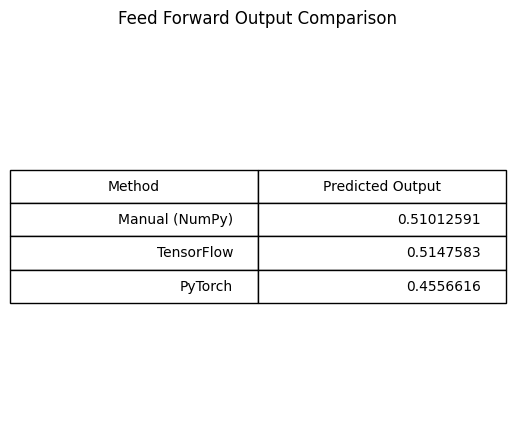

In [44]:
import matplotlib.pyplot as plt
methods = ["Manual (NumPy)", "TensorFlow", "PyTorch"]
values = [0.51012591,0.5147583,0.4556616]
fig, ax = plt.subplots()
ax.axis("off")
table_data = [[methods[i], values[i]] for i in range(len(methods))]
table = ax.table(
cellText=table_data,
colLabels=["Method", "Predicted Output"],
loc="center"
)
table.scale(1, 2)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Feed Forward Output Comparison", pad=20)
plt.show()